In [266]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<h3>DataSet</h3>

In [267]:
x_gen, y_gen = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)

In [268]:
x_df = pd.DataFrame(x_gen, columns=['weight', 'height'])
y_df = pd.DataFrame(y_gen, columns=['class'])

df = pd.concat([x_df, y_df], axis=1)

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


([], [])

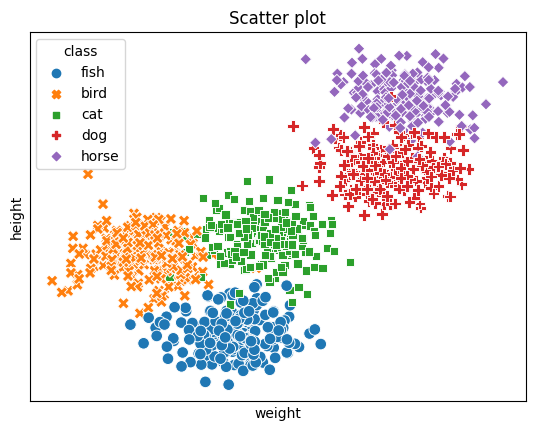

In [269]:
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.title('Scatter plot')
plt.xticks([])
plt.yticks([])

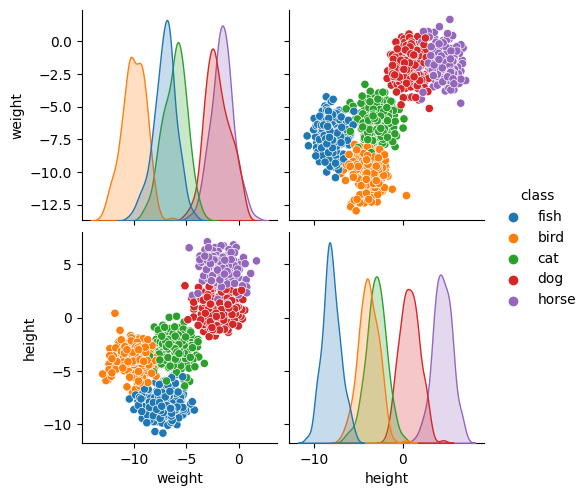

In [270]:
sns.pairplot(df, hue='class')

In [271]:
# Label Encoding
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [272]:
y[:10]

array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2])

In [273]:
x = df.drop('class', axis=1)
x.head

<bound method NDFrame.head of         weight    height
0    -7.253467 -7.947597
1   -12.447536 -5.822616
2    -5.973586 -3.275877
3    -5.310976 -2.953204
4    -1.860408  1.477063
..         ...       ...
995  -6.886691 -5.949491
996  -3.244524  5.761968
997  -1.385881  4.080185
998  -7.345220 -8.308230
999  -9.059102 -4.107031

[1000 rows x 2 columns]>

<h3>Feature Scaling</h3>

In [274]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_sc = sc.fit_transform(x)
x_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [275]:
y

array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 4, 4, 1, 0, 1, 4, 2, 2, 0, 1, 2,
       1, 4, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 4, 2, 0, 0, 1, 0, 3, 4, 4, 4,
       2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 0, 1, 0, 1, 4, 0, 2, 0, 1, 4, 4, 2,
       0, 4, 4, 2, 0, 3, 1, 2, 1, 3, 3, 2, 1, 0, 3, 1, 2, 0, 2, 2, 4, 3,
       3, 4, 0, 3, 3, 2, 4, 4, 2, 1, 2, 4, 3, 4, 2, 2, 1, 1, 4, 1, 4, 1,
       4, 1, 3, 1, 4, 3, 3, 4, 0, 4, 0, 3, 2, 4, 3, 2, 1, 2, 4, 2, 3, 4,
       2, 0, 2, 1, 2, 0, 1, 3, 1, 3, 0, 0, 0, 3, 0, 1, 2, 0, 0, 1, 4, 2,
       4, 1, 4, 0, 0, 2, 2, 3, 1, 0, 4, 0, 2, 1, 4, 0, 3, 2, 1, 1, 3, 3,
       0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 4, 1, 1, 3, 4, 4, 1, 3, 2, 0, 4,
       0, 0, 4, 3, 1, 1, 1, 3, 2, 1, 1, 4, 0, 4, 2, 4, 0, 0, 3, 1, 3, 4,
       3, 4, 3, 1, 3, 2, 4, 1, 4, 3, 0, 0, 0, 0, 2, 0, 4, 2, 4, 3, 2, 4,
       4, 3, 2, 4, 4, 3, 1, 0, 0, 4, 3, 2, 0, 4, 0, 3, 0, 4, 3, 1, 4, 1,
       0, 2, 0, 3, 3, 3, 3, 1, 4, 2, 1, 2, 1, 4, 4, 3, 0, 3, 4, 3, 4, 0,
       1, 1, 4, 1, 3, 2, 1, 4, 4, 0, 2, 4, 1, 3, 2,

<h3>Train-Test Split</h3>

In [276]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=20)

len(x_train), len(x_test)

(750, 250)

<h3>Model</h3>

In [277]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(5, activation='softmax'))

In [278]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 128)               384       
                                                                 
 dense_115 (Dense)           (None, 64)                8256      
                                                                 
 dense_116 (Dense)           (None, 32)                2080      
                                                                 
 dense_117 (Dense)           (None, 16)                528       
                                                                 
 dense_118 (Dense)           (None, 5)                 85        
                                                                 
Total params: 11333 (44.27 KB)
Trainable params: 11333 (44.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [279]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [280]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=100, verbose=0, batch_size=32, validation_split=0.25)

end = time.time()

print(f'time taken {end-start:.3f} sce')

time taken 2.465 sce


<h3>Evaluate</h3>

In [281]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.14744256436824799
Test accuracy : 0.9600


Text(0.5, 1.0, 'Accuracy Cruve')

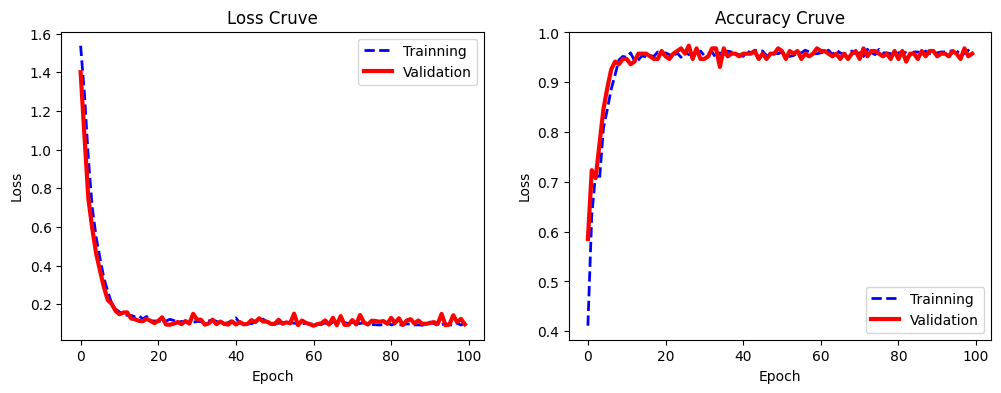

In [282]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

<h3>Predict</h3>

In [283]:
y_pred = model.predict(x_test)

y_pred[:4]
y_pred[:4].round(3)

8/8 [==============================] - 0s 542us/step


array([[0.   , 0.   , 0.595, 0.   , 0.405],
       [0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.998, 0.002, 0.   , 0.   , 0.   ],
       [0.001, 0.999, 0.   , 0.   , 0.   ]], dtype=float32)

In [284]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([2, 3, 0, 1])

In [285]:
class_names[y_pred_cat[:4]]

array(['dog', 'fish', 'bird', 'cat'], dtype=object)

In [286]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test, y_pred_cat))

              precision    recall  f1-score   support

        bird       0.97      0.98      0.97        57
         cat       0.96      0.93      0.95        46
         dog       0.96      0.94      0.95        52
        fish       0.96      0.98      0.97        50
       horse       0.96      0.96      0.96        45

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[56  1  0  0  0]
 [ 1 43  0  2  0]
 [ 0  1 49  0  2]
 [ 1  0  0 49  0]
 [ 0  0  2  0 43]]


Text(0.5, 1.0, 'Confusion Matrix')

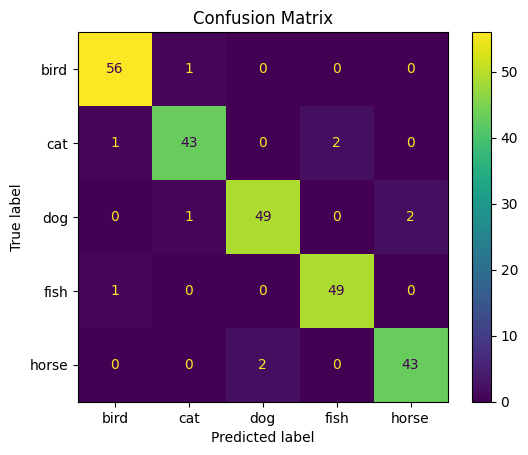

In [287]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_cat)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')

<h3>Decision Regions</h3>

In [288]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
        
    def predict(self, x):
        y_pred = self.model.predict(x)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 3s 299us/step


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'height')

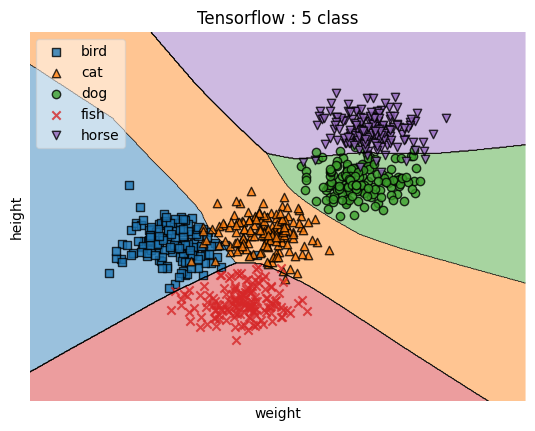

In [289]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_train, y_train, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

In [290]:
x, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=1.5, random_state=1)

x_df = pd.DataFrame(x, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([x_df, y_df], axis=1)

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat', 4:'dog'}
df['class'] = df['class'].map(target_map)

class_names, y = np.unique(df['class'], return_inverse=True)
class_names

df.sample(5, random_state=100)

x=df.drop('class', axis=1)
x.head()

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_sc = sc.fit_transform(x)
x_sc[:4]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.25, random_state=20)

len(x_train), len(x_test)

(225, 75)

In [291]:
opt_name = ''

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(5, activation='softmax'))

<h3>Complie Train and Evaluate</h3>

In [292]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [293]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=1000, verbose=0, batch_size=256, validation_data=(x_test, y_test))

end = time.time()

print(f'time taken {end-start:.3f} sce')

time taken 13.795 sce


In [294]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  1.178459644317627
Test accuracy : 0.8400


Text(0.5, 1.0, 'Accuracy Cruve')

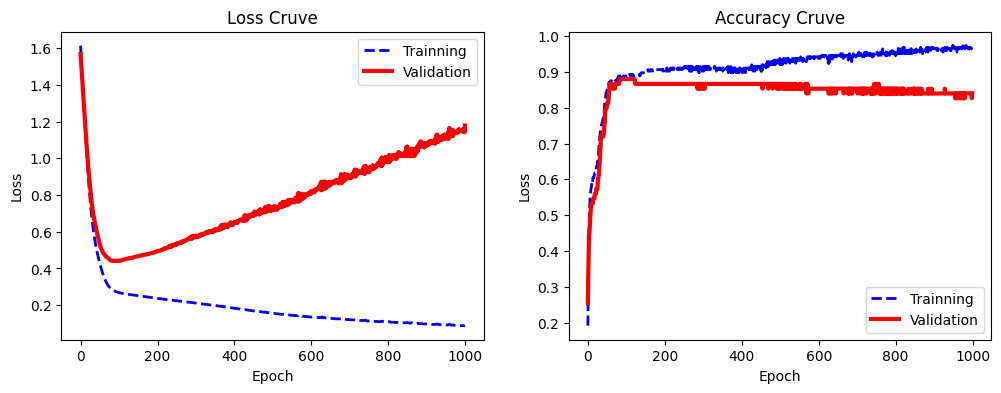

In [295]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

9600/9600 [==============================] - 4s 368us/step


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'height')

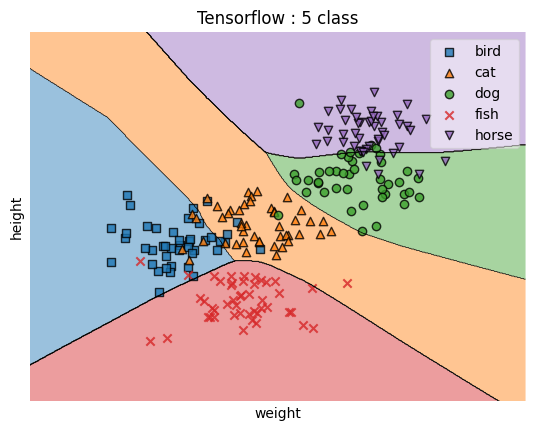

In [296]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_train, y_train, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

9600/9600 [==============================] - 3s 342us/step


Text(0, 0.5, 'height')

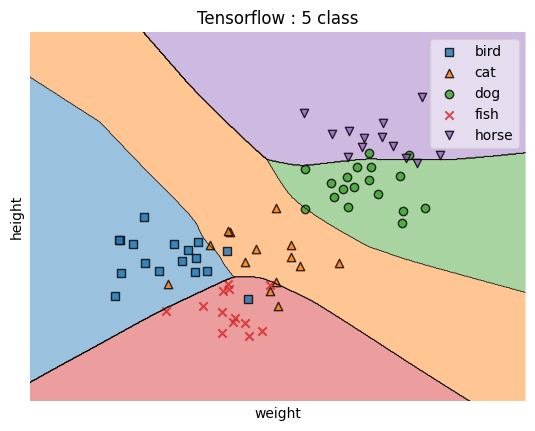

In [297]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, y_test, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

In [298]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1

opt_name = 'L1'

model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
# model.add(Dense(1, activation='sigmoid'))

# Rest of your code...


model.add(Dense(5, activation='softmax'))

In [299]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [300]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=1000, verbose=0, batch_size=256, validation_data=(x_test, y_test))

end = time.time()

print(f'time taken {end-start:.3f} sce')

time taken 13.457 sce


In [301]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.5296857953071594
Test accuracy : 0.8667


Text(0.5, 1.0, 'Accuracy Cruve')

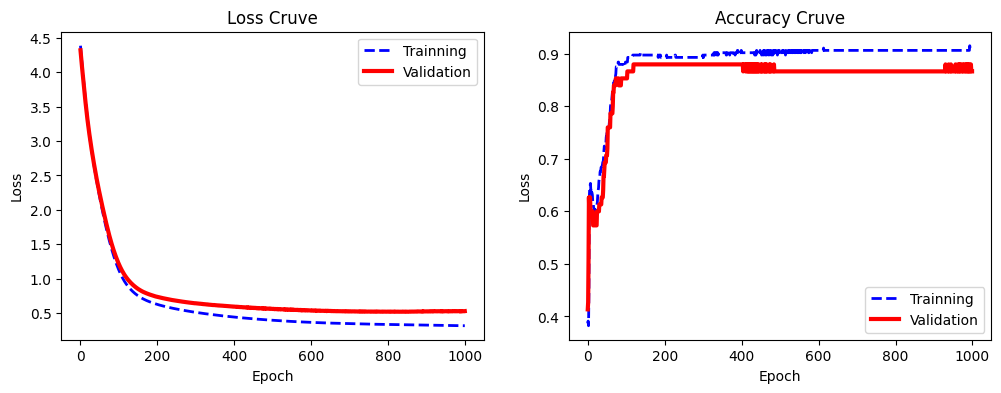

In [302]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

9600/9600 [==============================] - 3s 300us/step


Text(0, 0.5, 'height')

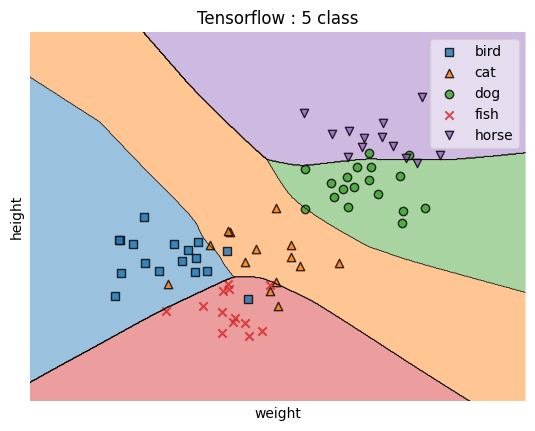

In [303]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, y_test, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

In [304]:
opt_name = 'L2'

model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dense(1, activation='sigmoid'))

# Rest of your code...


model.add(Dense(5, activation='softmax'))

In [305]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [306]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=1000, verbose=0, batch_size=256, validation_data=(x_test, y_test))

end = time.time()

print(f'time taken {end-start:.3f} sce')

time taken 12.900 sce


In [307]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.5086765885353088
Test accuracy : 0.8667


Text(0.5, 1.0, 'Accuracy Cruve')

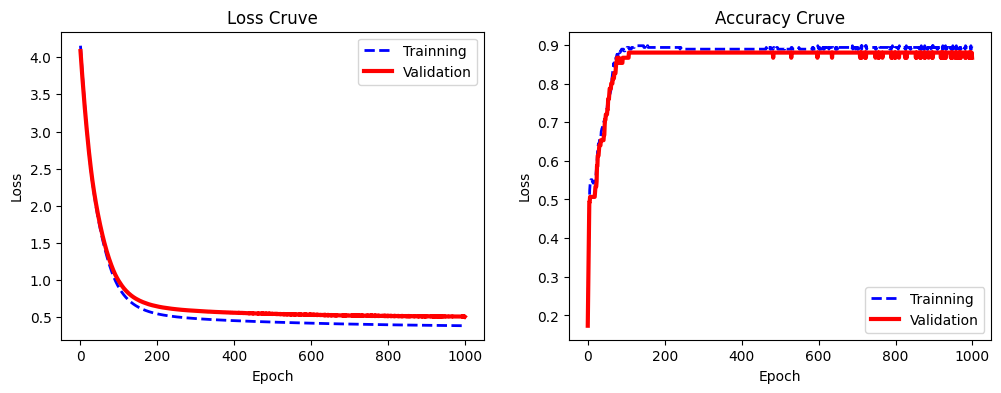

In [308]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

9600/9600 [==============================] - 3s 298us/step


Text(0, 0.5, 'height')

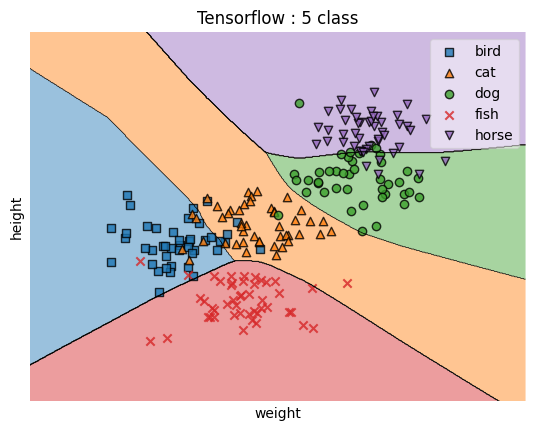

In [309]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_train, y_train, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

9600/9600 [==============================] - 3s 304us/step


Text(0, 0.5, 'height')

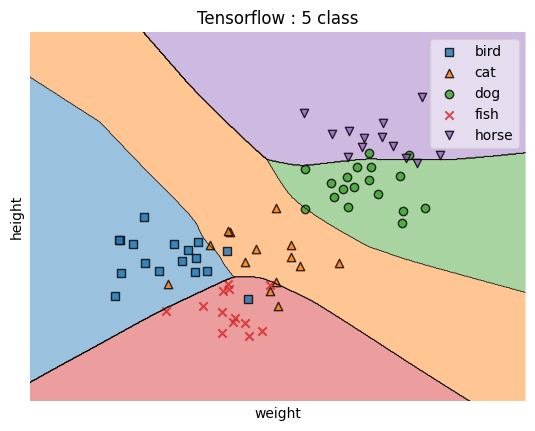

In [310]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, y_test, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

<h3>Dropout</h3>

In [311]:
from tensorflow.keras.layers import Dropout

opt_name = 'Dropout'

model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dropout(.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(.4))
# model.add(Dense(1, activation='sigmoid'))

# Rest of your code...


model.add(Dense(5, activation='softmax'))

In [312]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [313]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=1000, verbose=0, batch_size=256, validation_data=(x_test, y_test))

end = time.time()

print(f'time taken {end-start:.3f} sce')

time taken 13.893 sce


In [314]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Test loss :  0.6550003290176392
Test accuracy : 0.8800


Text(0.5, 1.0, 'Accuracy Cruve')

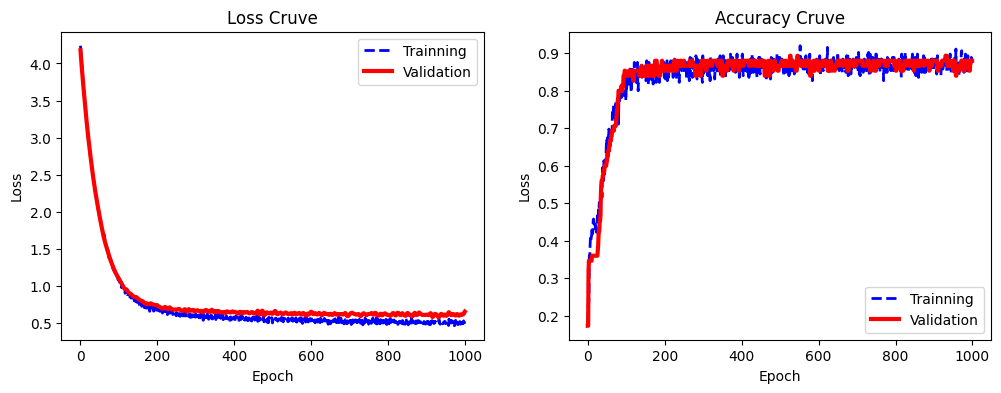

In [315]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

9600/9600 [==============================] - 3s 339us/step


Text(0, 0.5, 'height')

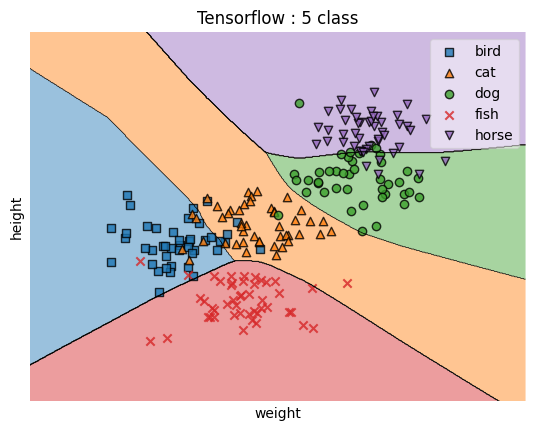

In [316]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_train, y_train, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

9600/9600 [==============================] - 3s 319us/step


Text(0, 0.5, 'height')

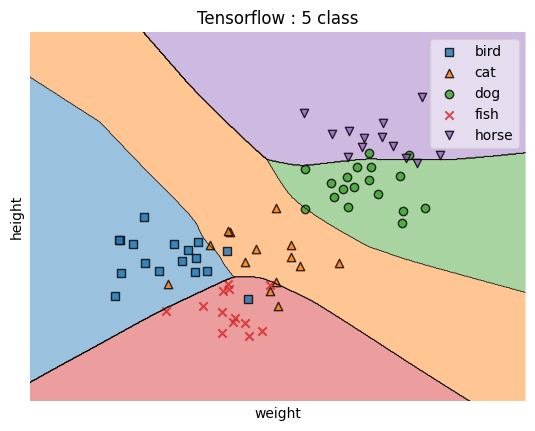

In [317]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, y_test, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

<h3>Early Stopping</h3>

In [318]:
from tensorflow.keras.callbacks import EarlyStopping

opt_name = 'EarlyStopping'

es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)

model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dense(1, activation='sigmoid'))

# Rest of your code...


model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

import time

start = time.time()

history = model.fit(x_train, y_train, epochs=1000, verbose=0, batch_size=256, validation_data=(x_test, y_test),
                    callbacks=[es])

end = time.time()

print(f'time taken {end-start:.3f} sce')

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

Epoch 834: early stopping
time taken 10.891 sce
Test loss :  0.5220023393630981
Test accuracy : 0.8800


Text(0.5, 1.0, 'Accuracy Cruve')

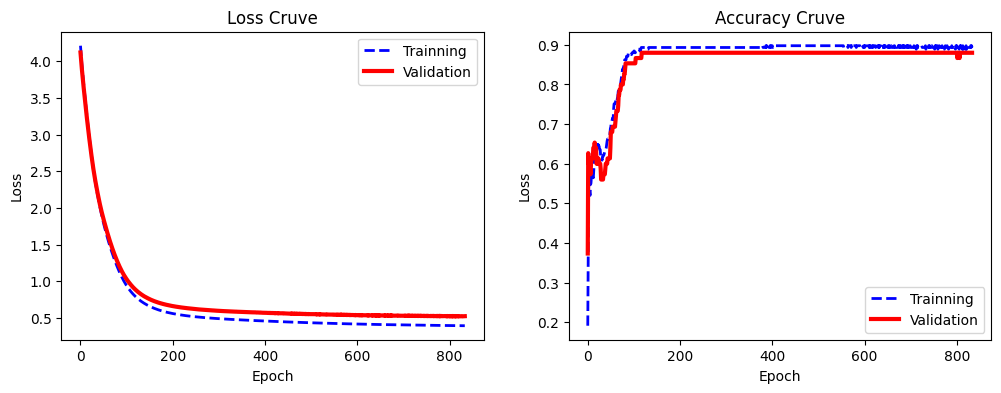

In [319]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

9600/9600 [==============================] - 3s 322us/step


Text(0, 0.5, 'height')

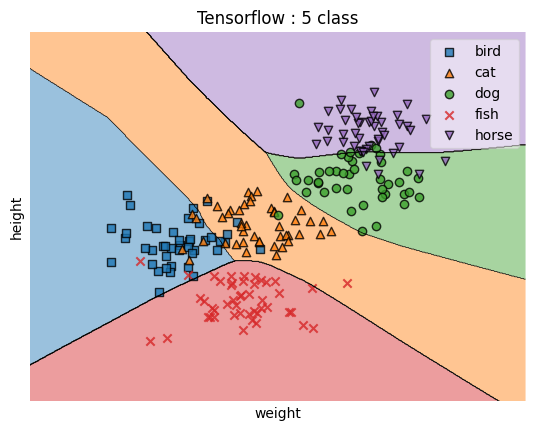

In [320]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_train, y_train, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')

9600/9600 [==============================] - 3s 327us/step


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Text(0, 0.5, 'height')

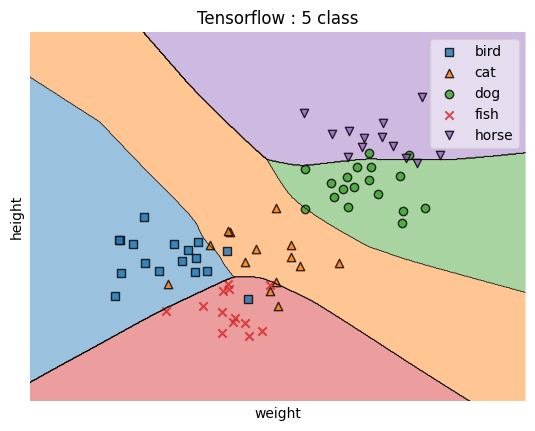

In [321]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(x_test, y_test, clf=model_no_ohe, zoom_factor=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title("Tensorflow : 5 class")
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')